# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/Aida/Desktop/Data Analysis/selected dataset/kc_house_data.csv", parse_dates = ['date'])

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Definition of all variables:
![title](img/variables explained.png)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


There are no missing values in the dataset.
Let's change data types so they would represent cathegorical types of features. We also change type of columns id and zipcode so it won't be interpreted as numeric variables.

In [4]:
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['id'] = df['id'].astype(str)
df['zipcode'] = df['zipcode'].astype(str)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Average house price in the dataset is 540.000 USD.
Average living house space in sqft is 2079.9. As a result, average price per sqft is around 260 USD.
We have noticed that max number of bedrooms is 33. This might be an error value.

In [6]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

There is only one value with bedrooms equal to 33, so we will remove it from the dataset.

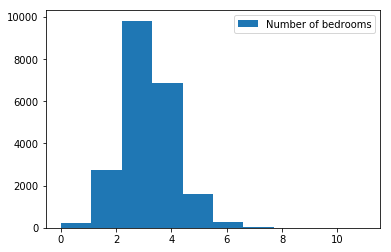

In [7]:
#Remove one entry with number of bedrooms = 33
df1 = df.drop(df[df.bedrooms == 33].index)
plt.figure()
plt.hist(df1[['bedrooms']].values, label='Number of bedrooms')
plt.legend()
plt.show()

As minimum value of bathrooms and bedrooms is 0, we will check if there any entries where both conditions are true. Let's have a look at the plot bedrooms vs bathrooms.

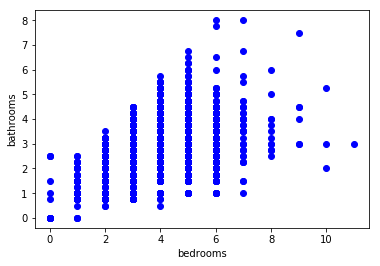

In [8]:
plt.figure()
plt.plot(df1[['bedrooms']], df1[['bathrooms']], 'o', color='blue')
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')
plt.show()

There are houses which have 0 bedrooms and 0 to 2.5 bathrooms. Let's remove entries with 0 bedrooms and 0 bathrooms as it might be non-living properties.

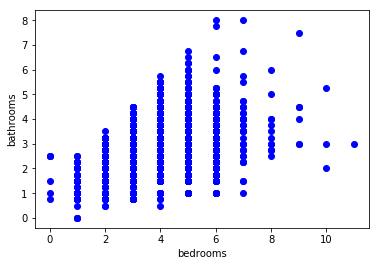

In [9]:
#Remove entries with bedrooms = 0 and bathrooms = 0
df2 = df1.drop(df[(df.bedrooms == 0) & (df.bathrooms == 0) ].index)
plt.figure()
plt.plot(df2[['bedrooms']], df2[['bathrooms']], 'o', color='blue' )
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')
plt.show()

## Numerical Values
In this section we will select all numeric values and will analyze it looking into distributions and pair wise correlation.

In [10]:
df_num= df2.select_dtypes(include=['float64', 'int64'])
df_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,47.6168,-122.045,1800,7503


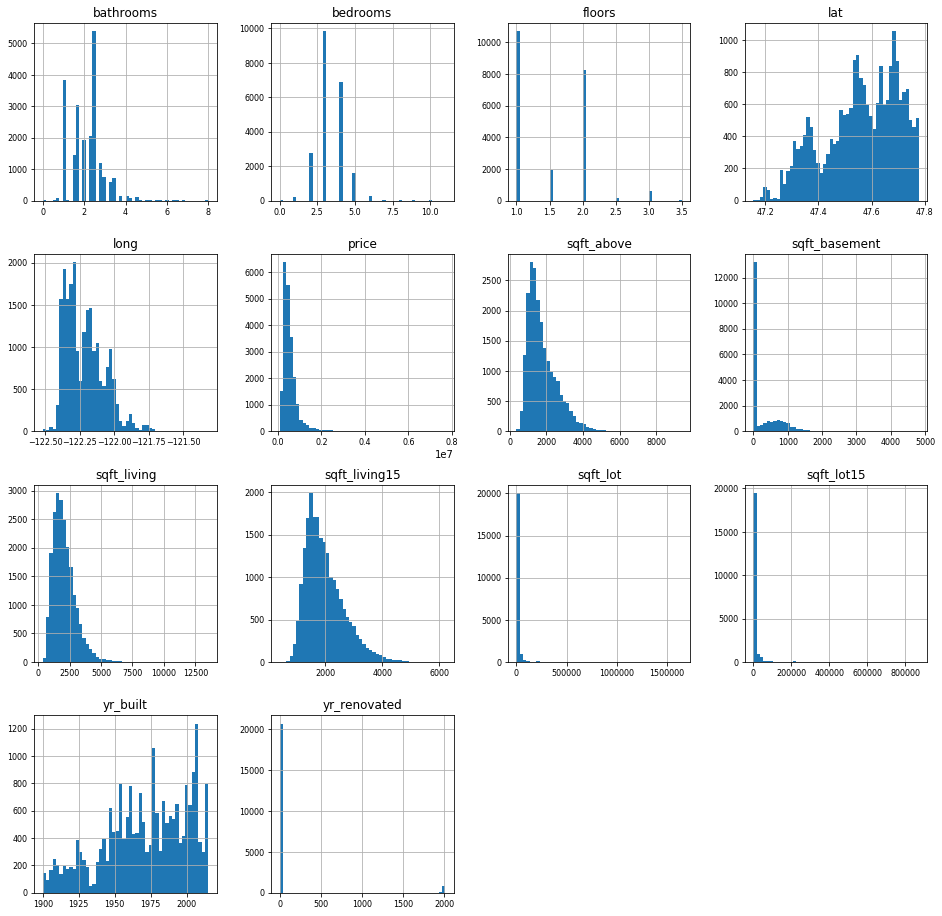

In [11]:
df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);

Some observations from the distribution plots:
- majority of houses observed has 1 floor
- majority of observations has 3 bedrooms
- majority of houses obesrved has 2.5 bathrooms
- variable sqft_basement has a lot of 0 values which means that a lot of houses does not have a basement
- variable sqft_lot also has a lot of 0 values which means that properties does not have a land plot. It can be considered as flats.

We will investigate correlations between pairs of variables using correlation matrix.

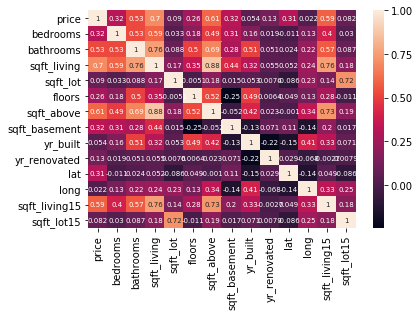

In [12]:
plt.figure()
corr = df_num.corr()
sns.heatmap(corr, annot=True, annot_kws={"size": 7},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);
plt.show()

In [13]:
#correlation matrix with better visible values.
corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1,0.3162,0.5259,0.7019,0.08965,0.2567,0.6054,0.3239,0.0539,0.1265,0.3069,0.0218,0.5853,0.08241
bedrooms,0.3162,1,0.5277,0.593,0.03274,0.1829,0.4923,0.3094,0.1598,0.01941,-0.01077,0.135,0.404,0.03046
bathrooms,0.5259,0.5277,1,0.7559,0.08774,0.5025,0.6868,0.2836,0.5069,0.05061,0.02448,0.2239,0.5698,0.08727
sqft_living,0.7019,0.593,0.7559,1,0.1728,0.3539,0.8765,0.4353,0.318,0.05538,0.05235,0.2405,0.7563,0.1833
sqft_lot,0.08965,0.03274,0.08774,0.1728,1,-0.005127,0.1836,0.01527,0.05309,0.007634,-0.08571,0.2296,0.1446,0.7186
floors,0.2567,0.1829,0.5025,0.3539,-0.005127,1,0.5239,-0.2456,0.4892,0.006406,0.04938,0.1257,0.28,-0.01119
sqft_above,0.6054,0.4923,0.6868,0.8765,0.1836,0.5239,1,-0.05188,0.4239,0.02331,-0.001013,0.3442,0.7317,0.194
sqft_basement,0.3239,0.3094,0.2836,0.4353,0.01527,-0.2456,-0.05188,1,-0.1331,0.07129,0.1105,-0.1447,0.2006,0.01729
yr_built,0.0539,0.1598,0.5069,0.318,0.05309,0.4892,0.4239,-0.1331,1,-0.2249,-0.1484,0.4095,0.3263,0.07098
yr_renovated,0.1265,0.01941,0.05061,0.05538,0.007634,0.006406,0.02331,0.07129,-0.2249,1,0.0294,-0.06836,-0.002666,0.007851


- Variable price correlates the best with variables related to the size of the house: the strongest correlation with sqft_living of 0.7019 and sqft_above of 0.6054.
- Price also correlates quite well with variable bathrooms.

In the graphs below we can observe relationships between each pair of numeric variables. In the diagional, there is distribution of the variable itself presented.

In [14]:
#sns.pairplot(df_num)

## Categorical Values
In this section we will select all categorical values and will analyze it looking into relationships with price variable.

In [15]:
#All category variables
df.select_dtypes(include=['category']).dtypes

waterfront    category
view          category
condition     category
grade         category
dtype: object

### Waterfront

In [16]:
df2.groupby('waterfront').mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,
0,5.315622e+05,3.371094,2.111184,2071.613376,15030.945714,1.493028,1783.132823,288.480552,1971.070889,81.180207,47.560227,-122.213405,1981.357336,12695.783975
1,1.661876e+06,3.300613,2.677914,3173.687117,25371.828221,1.641104,2473.042945,700.644172,1962.190184,512.392638,47.537364,-122.281601,2666.349693,22385.104294


Waterfront defines if property is overlooking waterfront or not.
- Properties overlooking waterfront are on average 3 times more expensive than properties without overlooking waterfront.
- Waterfront overlooking apartments are larger and have larger basements.

Boxplot below showing waterfront values' relation with price confirms our understanding.

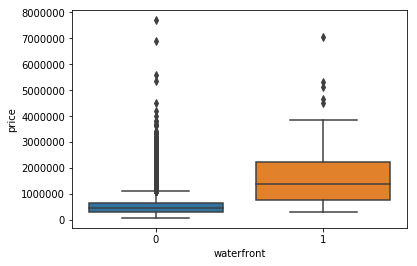

In [17]:
sns.boxplot(x='waterfront', y='price', data=df2);

### View

In [18]:
df2.groupby('view').mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
view,,,,,,,,,,,,,,
0,4.965730e+05,3.345583,2.070266,1997.786942,14179.908484,1.491120,1746.453934,251.333008,1971.615768,71.823333,47.559630,-122.209831,1924.625930,12187.733665
1,8.122808e+05,3.536145,2.349398,2568.960843,12358.918675,1.396084,1933.174699,635.786145,1962.996988,192.337349,47.580041,-122.286217,2408.415663,10773.677711
2,7.925151e+05,3.572320,2.430801,2656.065557,22297.290323,1.515088,2086.576483,569.489074,1964.867846,145.321540,47.563069,-122.239518,2431.403746,17328.107180
3,9.719653e+05,3.672549,2.671078,3018.564706,34788.884314,1.564706,2276.649020,741.915686,1967.439216,215.317647,47.547671,-122.243661,2702.082353,23863.464706
4,1.463711e+06,3.633229,2.793887,3351.473354,21594.987461,1.605016,2516.529781,834.943574,1966.150470,349.623824,47.575866,-122.263708,2843.752351,18867.141066


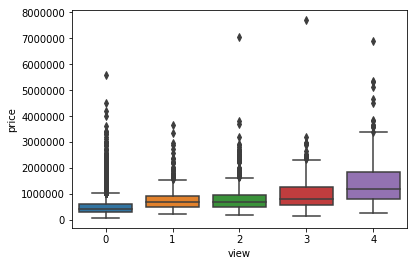

In [19]:
sns.boxplot(x='view', y='price', data=df2);

View grade indicates how good the view of the property is.
- the better the grade the more expensive property. Price is similar for grades 1 and 2.
- as per boxplot, we observed that view values 0, 2, 3 and 4 has outliers which might be luxury apartments.

### Condition

In [20]:
df2.groupby('condition').mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
condition,,,,,,,,,,,,,,
1,341067.241379,2.551724,1.215517,1247.931034,22174.379310,1.155172,1173.793103,74.137931,1930.448276,68.689655,47.578859,-122.273414,1808.965517,9495.068966
2,327287.145349,2.831395,1.449128,1410.058140,32502.901163,1.156977,1243.604651,166.453488,1948.941860,45.965116,47.525012,-122.237233,1585.447674,19548.168605
3,541966.193783,3.375374,2.223424,2148.861757,14760.220376,1.620241,1906.553116,242.308641,1979.457793,104.892414,47.564352,-122.203006,2043.741837,12514.159204
4,521267.535224,3.357520,1.900757,1951.186685,16021.890983,1.261184,1590.885347,360.301338,1958.348186,47.518140,47.546759,-122.227551,1901.256428,13702.189327
5,612401.864706,3.442941,2.024559,2023.148235,13056.730588,1.271765,1538.081765,485.066471,1946.448235,43.093529,47.572228,-122.255058,1842.861765,11123.236471


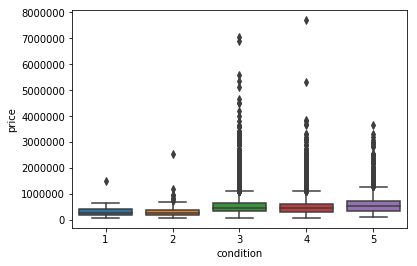

In [21]:
sns.boxplot(x='condition', y='price', data=df2);

Condition defines the condition of the apartment at the time of sale.
- Average price is similar for condition grades 1,2 and condition grades 3,4. 

### Grade

In [22]:
df2.groupby('grade').mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
grade,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.056667e+05,1.000000,0.250000,596.666667,26953.000000,1.000000,596.666667,0.000000,1945.333333,0.000000,47.334533,-121.883333,1163.333333,25888.000000
4,2.143810e+05,1.482759,0.905172,660.482759,22101.482759,1.034483,653.586207,6.896552,1939.137931,68.275862,47.494493,-122.179690,1525.172414,19950.000000
5,2.485240e+05,2.388430,1.113636,983.326446,24019.909091,1.086777,944.607438,38.719008,1935.454545,49.318182,47.499478,-122.199331,1380.570248,16122.433884
6,3.019196e+05,2.685967,1.243499,1191.561335,12646.953876,1.108685,1068.647694,122.913641,1942.471050,94.600589,47.533117,-122.262484,1389.247301,11020.924926
7,4.025346e+05,3.253425,1.829871,1689.373621,11769.472095,1.297148,1408.442241,280.931380,1963.627492,74.589841,47.553421,-122.232780,1679.287178,10615.411385
8,5.429106e+05,3.481042,2.348953,2184.820969,13513.152654,1.667903,1867.379492,317.441477,1980.394659,87.321794,47.565895,-122.207993,2067.147214,11370.825091
9,7.735132e+05,3.773231,2.664340,2868.139962,20638.515488,1.849140,2554.395411,313.744551,1988.419120,105.624092,47.575822,-122.165836,2613.460038,17401.707839
10,1.071771e+06,3.907407,3.006393,3520.299824,28191.063492,1.892857,3112.086420,408.213404,1989.569665,88.225750,47.590851,-122.151960,3036.892416,21334.663139


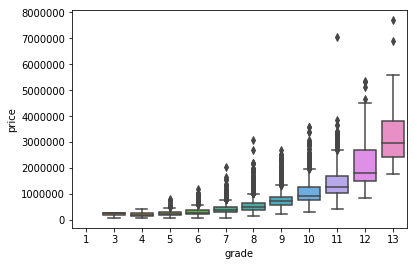

In [23]:
sns.boxplot(x='grade', y='price', data=df2);

Variable Grade is an index from 1 to 13 representing the quality and design of the building.
- the higher the Grade, the higher the price.